In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Sinc interpolation example
def interpol(t, x):
    '''Given a signal x and a list of timestamps t
    Return the sinc interpolation at the timestamps'''
    k = np.arange(len(x))
    tval, kval = np.meshgrid(t, k)
    ktmat = np.sinc(tval - kval)
    return np.dot(ktmat.T, x)

def deriv_sinc(x):
    '''Derivative of the sinc function'''
    x[x == 0] = 10**-10
    return (x * np.cos(x) - np.sin(x)) / x**2

def total_cost(x, y, a):
    '''Given x(t) and y(t), find ||x(at) - y(t)||**2'''
    N = min(int(len(x) / a), len(y))
    
    tvals = a * np.arange(int(len(x) / a))
   
    x_stretch = interpol(tvals, x)
    return x_stretch[:N], np.sum((x_stretch[:N] - y[:N])**2) / N
    

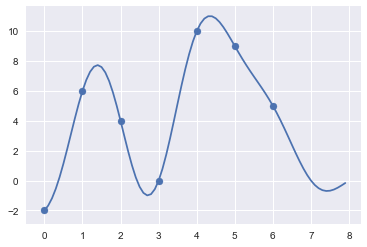

In [5]:
x = np.array([-2, 6,4,0,10, 9, 5])
t = np.arange(0, 8, 0.1)
plt.plot(t, interpol(t, x))
plt.scatter(range(len(x)), x)

In [ ]:
def find_gradient(t, x):
    '''Given a signal x and a list of timestamps t
    Return the gradient at the timestamps'''
    

In [6]:
# Read in the neural data
short_psth = np.genfromtxt('./Raws/psth_short_all_neurons_nans_171102.csv', delimiter=',')
long_psth = np.genfromtxt('./Raws/psth_long_all_neurons_nans_171102.csv', delimiter=',')

t_points_short = 7
t_points_long = 9
n_neurons = 105
dt_bin = 40 #ms

# Reshape the short and long raw data into tensors
reshaped_short_psth = np.reshape(short_psth, (n_neurons, t_points_short, -1))
reshaped_long_psth = np.reshape(long_psth, (n_neurons, t_points_long, -1))
duration_short = reshaped_short_psth.shape[2]
duration_long = reshaped_long_psth.shape[2]

# Combine short and long trials into one tensor
reshaped_short_pad = np.lib.pad(reshaped_short_psth, ((0,0), (0,0), 
                                                      (0, duration_long-duration_short)), 
                                'constant', constant_values=(np.nan, np.nan))
reshaped_all_pad = np.concatenate((reshaped_short_pad, reshaped_long_psth), axis=1)

# Swap axes to feed in twpca
swapped_all = np.swapaxes(reshaped_all_pad, 0, 2)
swapped_all = np.swapaxes(swapped_all, 0, 1)

# Define palette used in plotting
palette_blue = sns.palettes.color_palette('Blues', t_points_short)
palette_red = sns.palettes.color_palette('Reds', t_points_long)

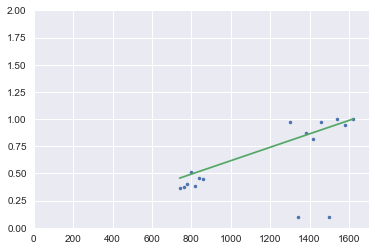

In [58]:
ntimes = 15
neuron = 23
sref = reshaped_all_pad[neuron, ntimes, :]
sref = sref[~np.isnan(sref)] / np.nanmax(sref)
stretchlst = np.arange(0.1, 1.0, 0.001)

min_stretch = []
for i in range(16):
    s1 = reshaped_all_pad[neuron, i, :]
    s1 = s1[~np.isnan(s1)] / np.nanmax(s1)
    cost = []
    for a in stretchlst:
        xs, cost_single = total_cost(s1, sref, a)
        cost.append(cost_single)
    min_stretch.append(stretchlst[np.argmin(cost)])
    #print(stretchlst[np.argmin(cost)])

times = np.array([740, 760, 780, 800, 820, 840, 860, 1300, 1340, 1380, 1420, 1460, 1500, 1540, 1580, 1620])
plt.plot(times, np.array(min_stretch), '.')
plt.xlim(0, 1700)
plt.ylim(0, 2)
plt.plot(times, times / 1620)

0.319
0.319


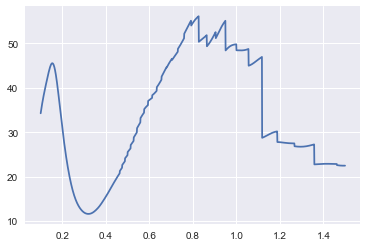

In [59]:
i = 0
neuron = 23
sref = reshaped_all_pad[neuron, ntimes, :]
sref = sref[~np.isnan(sref)]

s1 = reshaped_all_pad[neuron, i, :]
s1 = s1[~np.isnan(s1)]
cost = []
stretchlst = np.arange(0.1, 1.3, 0.001)
for a in stretchlst:
    xs, cost_single = total_cost(s1, sref, a)
    cost.append(cost_single)
min_stretch.append(stretchlst[np.argmin(cost)])
#plt.plot(stretchlst, cost)
print(stretchlst[np.argmin(cost)])

cost = []
stretchlst = np.arange(0.1, 1.5, 0.001)
for a in stretchlst:
    xs, cost_single = total_cost(s1, sref, a)
    cost.append(cost_single)

plt.plot(stretchlst, cost)
print(stretchlst[np.argmin(cost)])

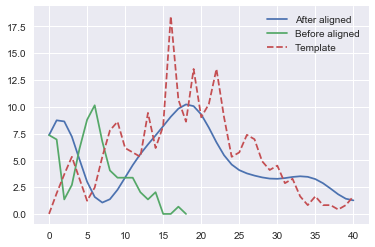

In [60]:
xstretch, _ = total_cost(s1, sref, 0.319)
plt.plot(xstretch, label='After aligned')
plt.plot(s1, label='Before aligned')
plt.plot(sref, '--', label='Template')
plt.legend()